# Project Report:1
A company froject named.

“Titanic survival prediction”

Project Report Submitted in Partial fulfilment of the requirement for 
the internship.

data analytics INTERNSHIP

Submitted by 

JITENDRA KUMAR

Reg email :- Jitusolanki321@gmail.com
 
company- codesoft
 
june - 2024


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from  sklearn.model_selection import train_test_split



In [68]:
titanic =pd.read_csv('..\desktop\Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

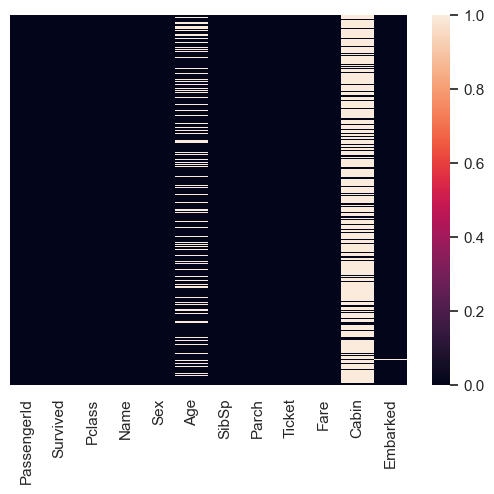

In [70]:
sns.heatmap(titanic.isnull(),yticklabels=False)

yticklables = False : breifs that the lables of y-axis will not be printed since their are a large number of records, and the following heat-map is plotted to check the presence of noisy data in the dataset

## Another simpler method to check the presence of null values is to take the aggregate

In [71]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since their are null values in the dataset, the first thing to perform the prediction is to perform the data cleaning to get more accurate results

In [72]:
Avgage = titanic.Age.mean()
Avgage

29.69911764705882

In [95]:
titanic.Age.fillna(Avgage, inplace=True)

In [96]:
train = titanic.drop("Cabin",axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [97]:
fare_mean=train.Fare.mean()
fare_mean

32.204207968574636

In [98]:
train.Fare.fillna(fare_mean,inplace=True)

In [99]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [100]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Now, since the data is cleaned, we start the process of data visualization to get the survival prediction.

# Data Analysis

In [102]:
train.shape

(891, 11)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [104]:
# to fid the number of people survived and the one who didn't survive
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

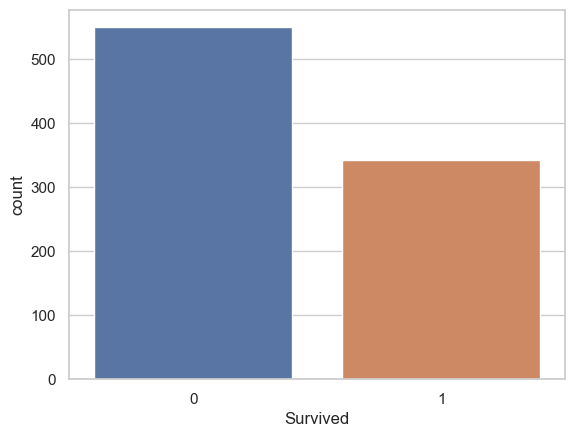

In [105]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data =train)

 Above plotted counter plot plotted is helping you to see the number of people who could not survive. Here, more than 500 pwople could not survive the tragedy and around 300 survives. But this countplot depicts the survival in a vague way

In [106]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [107]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

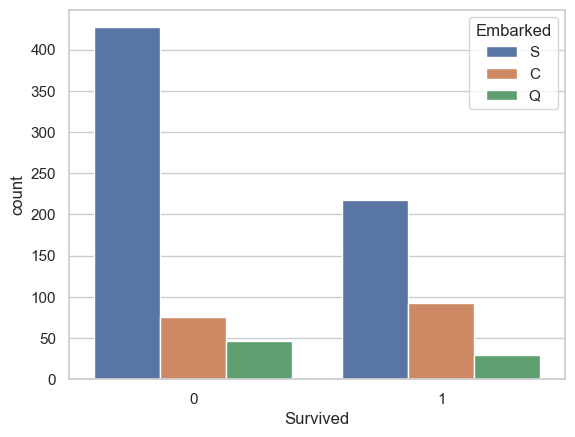

In [108]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train)

In [109]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

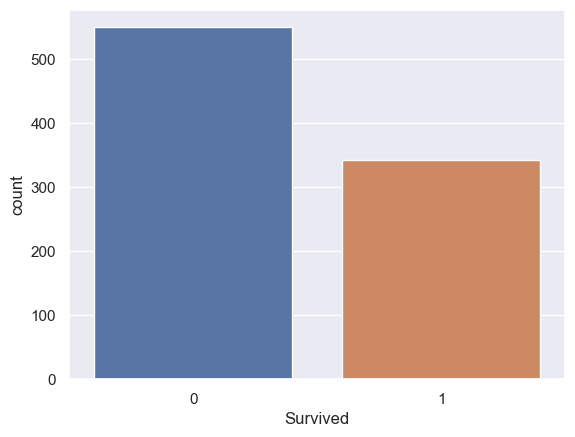

In [110]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Sex', ylabel='count'>

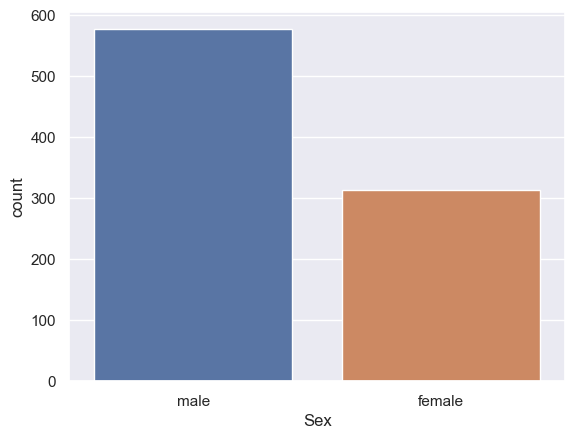

In [111]:
sns.countplot(x='Sex',data=train)

The above plotted countplot gives us a clear idea abour how many male and female survived the tragedy in a visualized way

<Axes: xlabel='Survived', ylabel='count'>

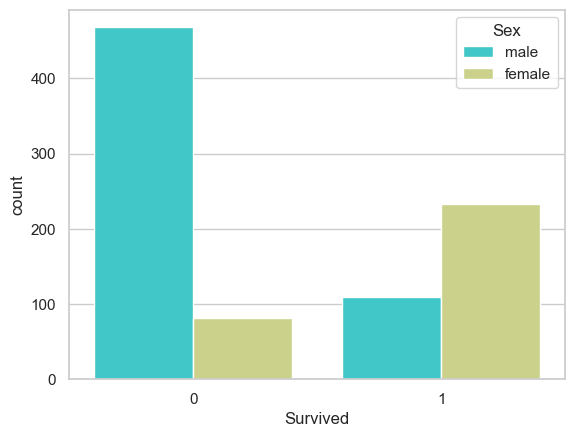

In [112]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

In the above countplot, we compare the survival with the Passenger class i.e.passengers who survivd being of different classes ranging from Rich to economy class

<Axes: xlabel='Pclass', ylabel='count'>

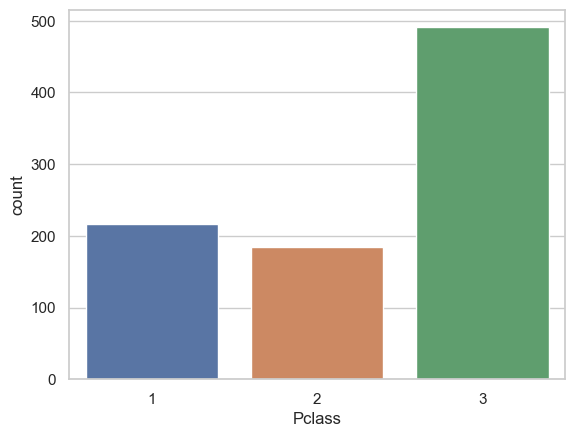

In [113]:
sns.countplot(x='Pclass',data=train)

<Axes: xlabel='Survived', ylabel='count'>

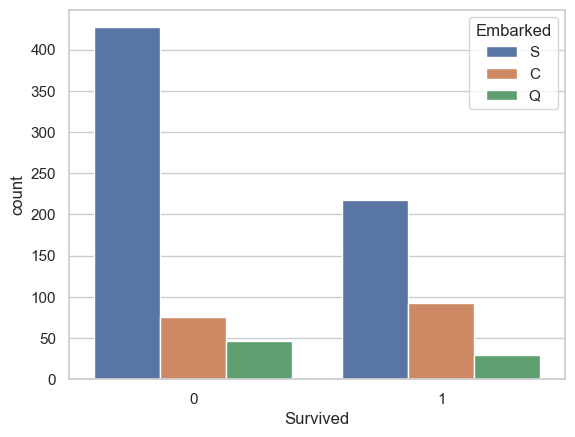

In [114]:
sns.countplot(x='Survived',hue='Embarked',data=train)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

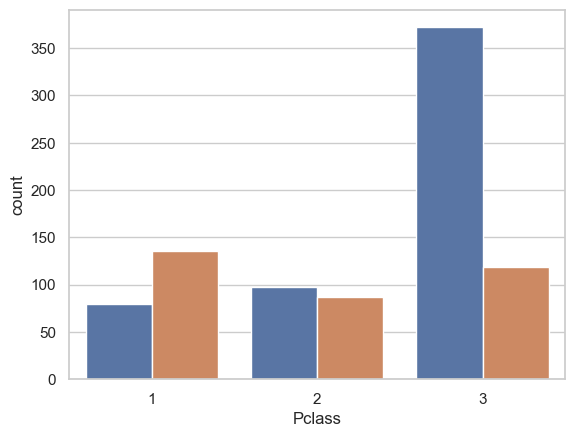

In [115]:
sns.countplot(x=train['Pclass'], hue=train['Survived'] ,data=train)

C:\Users\chinu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


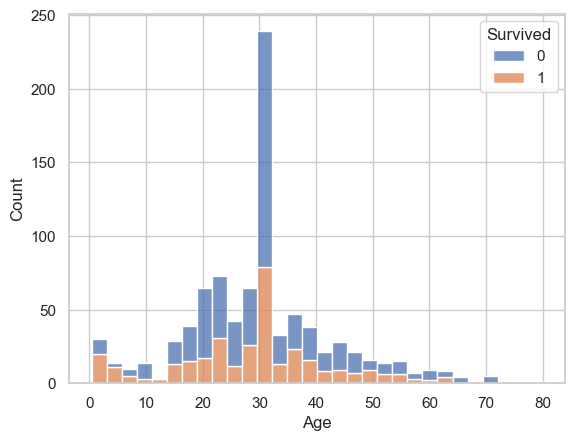

In [116]:
sns.histplot(x=train['Age'], hue=train['Survived'], multiple='stack')
plt.show()

C:\Users\chinu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


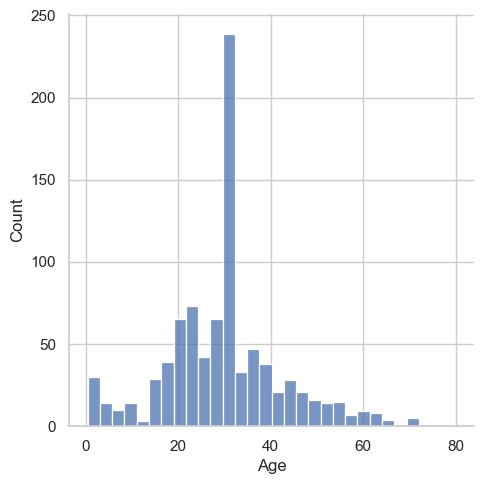

In [117]:
sns.displot(train['Age'])

To convert the categorical data into numerical values

In [118]:
# To encode the categorical columns into the statistical or numerical column
# to convert categorical columns
train.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)

In [119]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [120]:
# now we seperate our target entity from the rest f the dataset to help us with our analysis
X = train.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = train['Survived']


In [121]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,38.000000,1,0,71.2833,1.0
2,3,1,26.000000,0,0,7.9250,0.0
3,1,1,35.000000,1,0,53.1000,0.0
4,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0
887,1,1,19.000000,0,0,30.0000,0.0
888,3,1,29.699118,1,2,23.4500,0.0
889,1,0,26.000000,0,0,30.0000,1.0


In [122]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## To divide the data into training and testing dataset

In [123]:
# we create different arrays to hold the corrosponding values for X and Y
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)
# here, 0.2 represents "test data" as 20% in Machine Learning, we usually consider a ratio of 80:20 as Train:Test data
# random_state is used to split the data into/using similar way

In [124]:
print(X.shape,X_test.shape,X_train.shape)

(891, 7) (179, 7) (712, 7)
